<a href="https://colab.research.google.com/github/psrana/Machine-Learning-using-PyCaret/blob/main/01_PyCaret_for_Regression_with_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **PyCaret for Regression**
---
- It is a bundle of many Machine Learning algorithms.
- Only three lines of code is required to compare 20 ML models.
- Pycaret is available for:
    - Classification
    - Regression
    - Clustering
---

### **Self learning resource**
1. Tutorial on Pycaret **<a href="https://pycaret.readthedocs.io/en/latest/tutorials.html" target="_blank"> Click Here</a>** 

2. Documentation on Pycaret-Regression: **<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html" target="_blank"> Click Here </a>**

---

### **In this tutorial we will learn:**

- Getting Data
- Setting up Environment
- Create Model
- Tune Model
- Plot Model
- Finalize Model
- Predict Model
- Save / Load Model
---



### **(a) Install Pycaret**

In [1]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


### **(b) Get the version of the pycaret**

In [2]:
from pycaret.utils import version
version()

'2.3.4'

---
# **1. Regression: Basics**
---
### **1.1 Get the list of datasets available in pycaret (Total Datasets = 55)**




In [3]:
from pycaret.datasets import get_data
dataSets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


---
### **1.2 Get the "boston" dataset (Step-I)**
---

In [4]:
bostonDataSet = get_data("boston")    # SN is 46

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


---
### **1.3 Parameter setting for all models (Step-II)**
---

In [5]:
from pycaret.regression import *
s = setup(data =  bostonDataSet, target='medv', silent=True)

# Other Parameters:
# train_size = 0.7
# data_split_shuffle = False

,Description,Value
0,session_id,1530
1,Target,medv
2,Original Data,"(506, 14)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(354, 21)"


---
### **1.4 Run all models (Step-III)**
---

In [6]:
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1192,10.4911,3.0951,0.8824,0.1368,0.1058,0.451
gbr,Gradient Boosting Regressor,2.3067,11.8638,3.3277,0.8636,0.1408,0.1122,0.092
lightgbm,Light Gradient Boosting Machine,2.3566,12.4692,3.3973,0.8558,0.1509,0.1157,0.072
rf,Random Forest Regressor,2.3367,13.5794,3.5305,0.8484,0.1523,0.1156,0.512
ada,AdaBoost Regressor,2.8065,15.4191,3.8456,0.8192,0.1774,0.1483,0.093
dt,Decision Tree Regressor,3.0508,21.0803,4.4935,0.7625,0.1975,0.1510,0.017
lr,Linear Regression,3.4490,23.9317,4.8504,0.7240,0.2318,0.1703,0.278
ridge,Ridge Regression,3.4124,24.0696,4.8595,0.7233,0.2348,0.1692,0.012
br,Bayesian Ridge,3.4478,24.5777,4.9059,0.7192,0.2380,0.1710,0.013
en,Elastic Net,3.8509,28.8551,5.2985,0.6790,0.2551,0.1835,0.013


---
### **1.5 "Three line of code" for model comparison for "Boston" dataset**
---



In [7]:
from pycaret.datasets import get_data
from pycaret.regression import *

bostonDataSet = get_data("boston")
setup(data = bostonDataSet, target='medv', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1201,10.6201,3.1331,0.8649,0.1386,0.1073,0.450
gbr,Gradient Boosting Regressor,2.2226,11.4053,3.2662,0.8545,0.1479,0.1136,0.094
lightgbm,Light Gradient Boosting Machine,2.4202,13.5774,3.5642,0.8324,0.1648,0.1256,0.036
rf,Random Forest Regressor,2.3844,13.8122,3.5240,0.8282,0.1545,0.1206,0.501
ada,AdaBoost Regressor,2.7713,15.7058,3.8015,0.8103,0.1754,0.1458,0.093
lr,Linear Regression,3.2382,21.3194,4.5097,0.7361,0.2584,0.1662,0.013
lar,Least Angle Regression,3.2373,21.3185,4.5096,0.7361,0.2584,0.1661,0.016
ridge,Ridge Regression,3.2207,21.3765,4.5142,0.7356,0.2544,0.1654,0.012
br,Bayesian Ridge,3.2159,21.7414,4.5511,0.7319,0.2446,0.1645,0.013
lasso,Lasso Regression,3.6258,26.8278,5.0327,0.6817,0.2585,0.1750,0.015


---
### **1.6 "Three line of code" for model comparison for "Insurance" dataset**
---



In [8]:
from pycaret.datasets import get_data
from pycaret.regression import *

insuranceDataSet = get_data("insurance")
setup(data = insuranceDataSet, target='charges', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2588.5688,2.207113e+07,4610.6952,0.8541,0.4174,0.2924,0.086
lightgbm,Light Gradient Boosting Machine,2916.1136,2.452164e+07,4895.0861,0.8379,0.5305,0.3463,0.051
rf,Random Forest Regressor,2822.7213,2.555902e+07,5006.1196,0.8314,0.4556,0.3238,0.552
ada,AdaBoost Regressor,4153.8977,2.863353e+07,5306.2731,0.8125,0.6005,0.6659,0.031
et,Extra Trees Regressor,2837.9998,2.952762e+07,5408.3902,0.8050,0.4708,0.3106,0.503
llar,Lasso Least Angle Regression,4384.1579,3.936003e+07,6220.3637,0.7411,0.5619,0.4365,0.016
lr,Linear Regression,4390.0473,3.943106e+07,6225.8698,0.7406,0.5839,0.4375,0.013
lasso,Lasso Regression,4389.5031,3.942464e+07,6225.3448,0.7406,0.5825,0.4375,0.013
ridge,Ridge Regression,4401.6315,3.943001e+07,6226.2512,0.7406,0.5900,0.4397,0.012
br,Bayesian Ridge,4399.4718,3.943126e+07,6226.2742,0.7406,0.5833,0.4392,0.013


---
# **2. Regression: working with user dataset**
---
### **2.1 Download the "boston" dataset to local system** 
---

In [9]:
bostonDataSet.to_csv("bostonDataSet.csv", index=False)

from google.colab import files
files.download('bostonDataSet.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **2.2 Uploading "user file" from user system**

In [ ]:
from google.colab import files
files.upload()

---
### **2.3 "Read" the uploaded file**
---

In [ ]:
import pandas as pd
myDataSet = pd.read_csv('bostonDataSet (1).csv')
myDataSet.head()

---
### **2.4 "Compare" the model performance**
---

In [ ]:
from pycaret.regression import *
setup(data = myDataSet, target='medv', silent=True)
cm = compare_models()

---
### **2.5 "Three line of code" for model comparison for "user dataset**
##### Use it, while working on **"Anaconda/Jupyter notebook"** on local machine
---

In [ ]:
from pycaret.regression import *
import pandas as pd

#myDataSet = pd.read_csv("myData.csv")
#s = setup(data = myDataSet, target='cancer'), silent=True)
#cm = compare_models()

---
# **3. Regression: Apply "Data Preprocessing"**
---

### **3.1 Model performance using "Normalization"**

In [10]:
setup(data = bostonDataSet, target = 'medv', normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

#normalize_method = {zscore, minmax, maxabs, robust}

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0789,9.2819,2.9816,0.8807,0.1307,0.1029,0.443
gbr,Gradient Boosting Regressor,2.1517,10.1159,3.0715,0.8700,0.1383,0.1082,0.094
lightgbm,Light Gradient Boosting Machine,2.2509,11.9911,3.3022,0.8540,0.1397,0.1091,0.038
rf,Random Forest Regressor,2.2635,11.6938,3.2839,0.8506,0.1447,0.1130,0.510
ada,AdaBoost Regressor,2.8157,15.8378,3.8836,0.8019,0.1738,0.1449,0.093
knn,K Neighbors Regressor,2.7584,17.2265,4.0380,0.7960,0.1635,0.1279,0.061
br,Bayesian Ridge,3.2470,23.3873,4.6942,0.7258,0.2232,0.1567,0.013
huber,Huber Regressor,3.0919,24.5818,4.7594,0.7207,0.2399,0.1471,0.029
ridge,Ridge Regression,3.3076,23.6108,4.7290,0.7206,0.2297,0.1598,0.012
lr,Linear Regression,3.3285,23.7537,4.7472,0.7182,0.2331,0.1610,0.012


---
### **3.2 Model performance using "Feature Selection"**
---

In [11]:
setup(data = bostonDataSet, target = 'medv', feature_selection = True, feature_selection_method = 'classic', feature_selection_threshold = 0.2,  silent=True)
cm = compare_models()

#feature_selection_method = {classic, boruta}

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.2011,11.1541,3.2554,0.8518,0.1410,0.1103,0.406
gbr,Gradient Boosting Regressor,2.2490,11.4123,3.3158,0.8458,0.1472,0.1147,0.083
lightgbm,Light Gradient Boosting Machine,2.3751,13.1561,3.5318,0.8230,0.1541,0.1182,0.038
rf,Random Forest Regressor,2.3640,13.9231,3.6330,0.8166,0.1546,0.1200,0.488
ada,AdaBoost Regressor,2.7359,15.9780,3.9208,0.7918,0.1860,0.1505,0.087
lr,Linear Regression,3.5051,24.4833,4.8523,0.6963,0.2637,0.1832,0.013
ridge,Ridge Regression,3.5155,24.8190,4.8750,0.6949,0.2704,0.1848,0.013
br,Bayesian Ridge,3.5798,25.5338,4.9418,0.6880,0.2637,0.1883,0.013
huber,Huber Regressor,3.4602,26.6242,4.9916,0.6801,0.2674,0.1782,0.037
lasso,Lasso Regression,3.8633,29.2232,5.2848,0.6515,0.2743,0.1917,0.013


---
### **3.3 Model performance using "Outlier Removal"**
---

In [12]:
setup(data = bostonDataSet, target = 'medv', remove_outliers = True, outliers_threshold = 0.05, silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1695,10.1719,3.1104,0.8753,0.1335,0.1064,0.438
gbr,Gradient Boosting Regressor,2.2739,10.3490,3.1453,0.8708,0.1400,0.1132,0.091
lightgbm,Light Gradient Boosting Machine,2.4096,12.3824,3.4523,0.8521,0.1553,0.1219,0.036
rf,Random Forest Regressor,2.3533,12.5904,3.4721,0.8453,0.1489,0.1170,0.508
ada,AdaBoost Regressor,2.8645,15.9367,3.9178,0.8083,0.1776,0.1487,0.095
ridge,Ridge Regression,3.4052,22.6617,4.6822,0.7310,0.2294,0.1644,0.012
lr,Linear Regression,3.4217,22.6801,4.6901,0.7302,0.2271,0.1651,0.013
lar,Least Angle Regression,3.4229,22.7087,4.6933,0.7300,0.2284,0.1652,0.016
br,Bayesian Ridge,3.3983,23.1846,4.7381,0.7252,0.2327,0.1639,0.013
dt,Decision Tree Regressor,3.2580,23.6182,4.6653,0.7230,0.2022,0.1624,0.017


---
### **3.4 Model performance using "Transformation"**
---

In [13]:
setup(data = bostonDataSet, target = 'medv', transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.2541,11.3906,3.2091,0.8566,0.1419,0.1112,0.459
gbr,Gradient Boosting Regressor,2.3480,13.0865,3.3857,0.8402,0.1499,0.1165,0.092
lightgbm,Light Gradient Boosting Machine,2.5278,14.8434,3.6897,0.8170,0.1609,0.1234,0.039
rf,Random Forest Regressor,2.4328,14.9231,3.6812,0.8169,0.1570,0.1204,0.509
knn,K Neighbors Regressor,2.8051,18.3190,4.1242,0.7909,0.1730,0.1341,0.062
ada,AdaBoost Regressor,3.0080,18.3373,4.1178,0.7687,0.1877,0.1584,0.093
br,Bayesian Ridge,3.4110,21.9315,4.6097,0.7312,0.2125,0.1714,0.013
ridge,Ridge Regression,3.4534,22.0940,4.6305,0.7285,0.2138,0.1730,0.012
lr,Linear Regression,3.4676,22.1792,4.6403,0.7273,0.2142,0.1736,0.012
lar,Least Angle Regression,3.4698,22.1917,4.6415,0.7272,0.2142,0.1736,0.015


---
### **3.5 Model performance using "PCA"**
---

In [14]:
setup(data = bostonDataSet, target = 'medv', pca = True, pca_method = 'linear', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,4.8495,49.7984,6.9598,0.3634,0.2897,0.2417,0.399
rf,Random Forest Regressor,4.7900,50.0362,7.0080,0.3579,0.2890,0.2405,0.444
gbr,Gradient Boosting Regressor,4.8618,52.1518,7.1293,0.3425,0.2870,0.2396,0.058
lightgbm,Light Gradient Boosting Machine,5.2107,55.3523,7.3508,0.3104,0.2996,0.2586,0.031
knn,K Neighbors Regressor,5.3081,58.2070,7.4640,0.2792,0.3071,0.2659,0.061
lr,Linear Regression,5.4159,59.5231,7.6389,0.2616,0.3081,0.2673,0.012
ridge,Ridge Regression,5.4159,59.5231,7.6389,0.2616,0.3081,0.2673,0.012
lar,Least Angle Regression,5.4159,59.5231,7.6389,0.2616,0.3081,0.2673,0.013
lasso,Lasso Regression,5.4187,59.5230,7.6388,0.2615,0.3081,0.2676,0.014
en,Elastic Net,5.4174,59.5226,7.6388,0.2615,0.3081,0.2674,0.014


---
### **3.6 Model performance using "Outlier Removal" + "Normalization"**
---

In [15]:
setup(data = bostonDataSet, target = 'medv', remove_outliers = True, outliers_threshold = 0.05, 
          normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0886,10.0360,2.9947,0.8598,0.1339,0.1047,0.433
gbr,Gradient Boosting Regressor,2.1618,9.8442,3.0228,0.8593,0.1399,0.1107,0.093
rf,Random Forest Regressor,2.2063,10.8708,3.1272,0.8455,0.1425,0.1111,0.508
lightgbm,Light Gradient Boosting Machine,2.4372,12.7935,3.4367,0.8170,0.1579,0.1238,0.036
ada,AdaBoost Regressor,2.7606,15.7466,3.8289,0.7755,0.1818,0.1488,0.091
knn,K Neighbors Regressor,2.7926,18.0166,4.0550,0.7590,0.1752,0.1349,0.061
dt,Decision Tree Regressor,2.8183,16.9607,4.0178,0.7433,0.1870,0.1442,0.016
br,Bayesian Ridge,3.2385,22.1197,4.5998,0.6864,0.2467,0.1642,0.013
ridge,Ridge Regression,3.2779,22.1043,4.6092,0.6850,0.2450,0.1658,0.013
lr,Linear Regression,3.2999,22.2001,4.6239,0.6831,0.2448,0.1668,0.012


---
### **3.7 Model performance using "Outlier Removal" +  "Normalization" + "Transformation"**
---

In [16]:
setup(data = bostonDataSet, target = 'medv', remove_outliers = True, outliers_threshold = 0.05, 
          normalize = True, normalize_method = 'zscore', 
          transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.3919,11.1965,3.3189,0.8320,0.1560,0.1249,0.092
rf,Random Forest Regressor,2.4633,12.6059,3.5143,0.8181,0.1570,0.1262,0.509
et,Extra Trees Regressor,2.4507,13.3392,3.5538,0.8066,0.1527,0.1207,0.438
lightgbm,Light Gradient Boosting Machine,2.5791,14.6959,3.7640,0.7880,0.1643,0.1280,0.039
ada,AdaBoost Regressor,2.8941,16.1007,3.9452,0.7823,0.1850,0.1551,0.095
knn,K Neighbors Regressor,3.1923,23.7461,4.6725,0.6949,0.1901,0.1517,0.062
huber,Huber Regressor,3.4843,25.0793,4.9458,0.6633,0.2239,0.1745,0.030
br,Bayesian Ridge,3.5424,23.4828,4.8040,0.6628,0.2300,0.1855,0.014
ridge,Ridge Regression,3.5978,23.6408,4.8208,0.6595,0.2317,0.1880,0.012
lr,Linear Regression,3.6434,23.9303,4.8490,0.6557,0.2336,0.1900,0.012


---
### **3.8 Explore more parameters of "setup()" on pycaret**
---
- Explore setup() paramaeters in **Step 1.3**
- **<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html" target="_blank"> Click Here</a>** for more

---
# **4. Regression: More Operations**
---
### **4.1 Build a single model - "RandomForest"**

In [17]:
from pycaret.datasets import get_data
from pycaret.regression import *

bostonDataSet = get_data("boston")    # SN is 46
setup(data =  bostonDataSet, target='medv', silent=True)

rfModel = create_model('rf')
# Explore more parameters

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.9900,27.7016,5.2632,-0.0653,0.2042,0.1619
1,2.7103,13.0496,3.6124,0.8969,0.1771,0.1475
2,1.6938,4.7156,2.1715,0.9340,0.1024,0.0860
3,2.1573,10.3192,3.2124,0.8359,0.1364,0.1089
4,1.8418,5.5797,2.3621,0.7996,0.1182,0.0978
5,1.8517,5.6582,2.3787,0.9274,0.1283,0.1063
6,1.9819,8.3018,2.8813,0.9233,0.1156,0.0938
7,3.2172,19.7097,4.4396,0.8042,0.1802,0.1339
8,2.2179,10.6172,3.2584,0.8884,0.1261,0.1023
9,3.3261,37.9011,6.1564,0.6350,0.2126,0.1474


---
### **4.2 Other available regression models**
---
-	'ada' - AdaBoost Regressor
-	'br' - Bayesian Ridge
-	'dt' - Decision Tree Regressor
-	'en'	- Elastic Net
-	'et' - Extra Trees Regressor
-	'gbr' - Gradient Boosting Regressor
-	'huber' - Huber Regressor
-	'knn' - K Neighbors Regressor
-	'llar' - Lasso Least Angle Regression
-	'lasso' - Lasso Regression
-	'lar' - Least Angle Regression
-	'lightgbm'	- Light Gradient Boosting Machine
-	'lr' - Linear Regression
-	'omp' - Orthogonal Matching Pursuit
-	'par' - Passive Aggressive Regressor
-	'rf' - Random Forest Regressor
-	'ridge' - Ridge Regression

---
### **4.3 Explore more parameters of "create_model()" on pycaret**
---

**<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html#pycaret.regression.create_model" target="_blank"> Click Here</a>** 

---
### **4.4 Make prediction on the "new unseen dataset"**
---
#### **Get the "new unseen dataset"**



In [18]:
# Select top 10 rows from boston dataset
newDataSet = get_data("boston").iloc[:10]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### **Make prediction on "new unseen dataset"**

In [19]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Label
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,27.036000
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,21.730000
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34.873001
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,34.203001
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,35.288001
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,23.822000
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,21.995000
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,23.114000
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,16.603000
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,19.134000


---
### **4.5 "Scatter plot" b/w actual and predicted** 
---

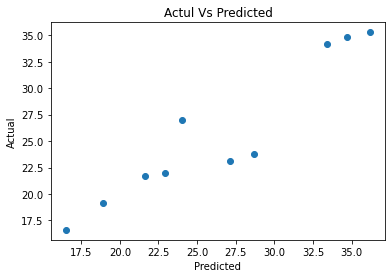

In [20]:
import matplotlib.pyplot as plt

predicted = newPredictions.iloc[:,-1]     # Last column
actual = newPredictions.iloc[:,-2]        # 2nd last column

plt.scatter(actual, predicted)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actul Vs Predicted')
plt.savefig("result-scatter-plot.jpg", dpi=300)
plt.show()

---
### **4.6 Download the "Scatter plot"** 
---

In [ ]:
from google.colab import files
files.download('result-scatter-plot.jpg')

---
### **4.7 "Save" and "Download" the prediction result** 
---

In [ ]:
from google.colab import files

newPredictions.to_csv("NewPredictions.csv", index=False)
files.download('NewPredictions.csv')

---
### **4.8 "Save" the trained model** 
---

In [ ]:
sm = save_model(rfModel, 'rfModelFile')

---
### **4.9 Download the "trained model file" to user local system** 
---

In [ ]:
from google.colab import files
files.download('rfModelFile.pkl')

---
### **4.10  "Upload the trained model" --> "Load the model"  --> "Make the prediction" on "new unseen dataset"** 
---
### **4.10.1 Upload the  "Trained Model"**


In [ ]:
from google.colab import files
files.upload()

---
### **4.10.2 Load the "Model"**
---

In [ ]:
rfModel = load_model('rfModelFile (1)')

---
### **4.10.3 Make the prediction on "new unseen dataset"**
---

In [ ]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

---
# **5. Plot the trained model**
---
**Following parameters can be plot for a trained model**

- Prediction Error Plot    - 'error'
- Learning Curve           - 'learning'
- Validation Curve         - 'vc'
- Feature Importance       - 'feature'
- Model Hyperparameter     - 'parameter'

---
### **5.1 Create RandomForest model or any other model**
---

In [22]:
rfModel = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.9900,27.7016,5.2632,-0.0653,0.2042,0.1619
1,2.7103,13.0496,3.6124,0.8969,0.1771,0.1475
2,1.6938,4.7156,2.1715,0.9340,0.1024,0.0860
3,2.1573,10.3192,3.2124,0.8359,0.1364,0.1089
4,1.8418,5.5797,2.3621,0.7996,0.1182,0.0978
5,1.8517,5.6582,2.3787,0.9274,0.1283,0.1063
6,1.9819,8.3018,2.8813,0.9233,0.1156,0.0938
7,3.2172,19.7097,4.4396,0.8042,0.1802,0.1339
8,2.2179,10.6172,3.2584,0.8884,0.1261,0.1023
9,3.3261,37.9011,6.1564,0.6350,0.2126,0.1474


---
### **5.2 Plot the "error"**
---

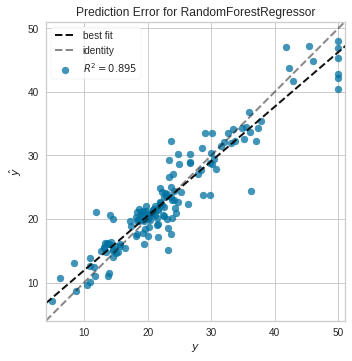

In [23]:
plot_model(rfModel, plot='error')

---
### **5.3 Plot the "learning curve"**
---

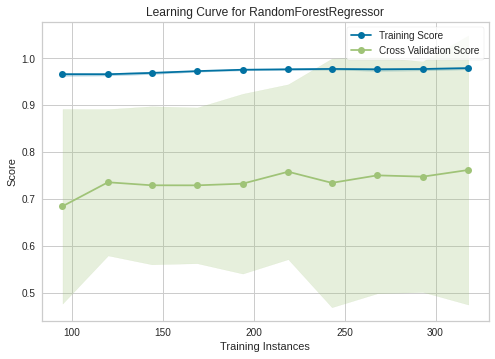

In [24]:
plot_model(rfModel, plot='learning')

---
### **5.4 Plot the "validation curve"**
---

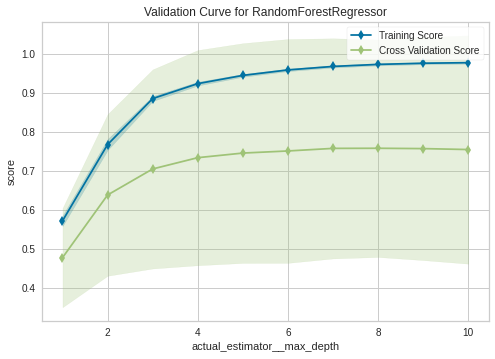

In [25]:
plot_model(rfModel, plot='vc')

---
### **5.5 Get the model "parameters"**
---

In [26]:
plot_model(rfModel, plot='parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1


---
### **5.6 Explore the more parameters of "plot_model()" on pycaret**
---
**<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html#pycaret.regression.plot_model" target="_blank"> Click Here </a>**

---
# **6. Feature Importance**
---
### **6.1 Feature Importance using "Random Forest"**


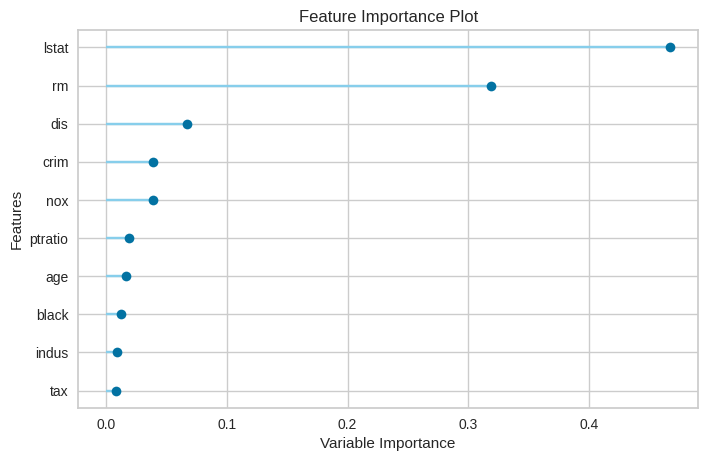

In [27]:
rfModel = create_model('rf', verbose=False)
plot_model(rfModel, plot='feature')

---
### **6.2 Feature Importance using "Extra Trees Regressor"**
---

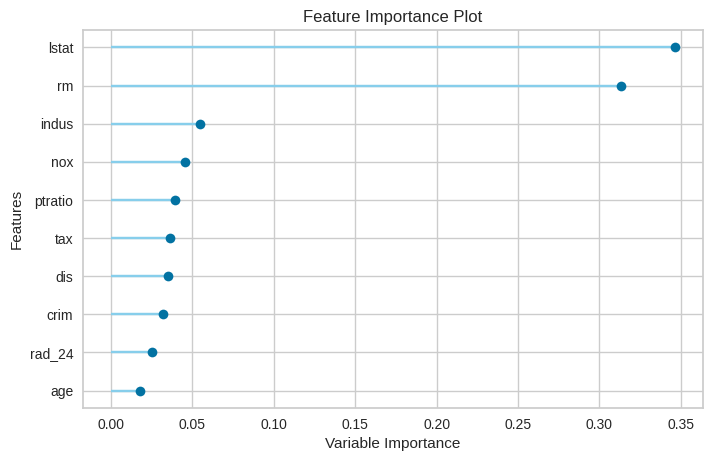

In [28]:
etModel = create_model('et', verbose=False)
plot_model(etModel, plot='feature')

---
### **6.3 Feature Importance using "Decision Tree"**
---

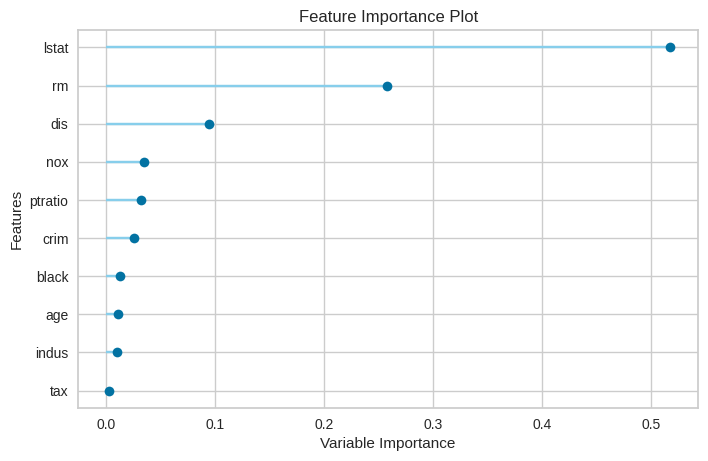

In [29]:
dtModel = create_model('dt', verbose=False)
plot_model(dtModel, plot='feature')

---
# **7. Tune/Optimize the model performance**
---
### **7.1 Train "Decision Tree" with default parameters**


In [30]:
dtModel = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.4528,30.2775,5.5025,-0.1643,0.2672,0.2168
1,2.9306,17.1069,4.1361,0.8649,0.1773,0.1467
2,2.2167,8.6044,2.9333,0.8796,0.1467,0.1210
3,3.8583,40.9114,6.3962,0.3494,0.2422,0.1900
4,2.4686,10.8851,3.2993,0.6091,0.1625,0.1262
5,2.3286,9.0214,3.0036,0.8843,0.1386,0.1217
6,3.7029,26.0674,5.1056,0.7593,0.2073,0.1749
7,2.7257,13.5846,3.6857,0.8651,0.1919,0.1345
8,2.5171,16.8551,4.1055,0.8229,0.1792,0.1221
9,3.5029,40.1240,6.3344,0.6136,0.2193,0.1501


#### **Get the "parameters" of Decision Tree**

In [31]:
plot_model(dtModel, plot='parameter')

,Parameters
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0


---
### **7.2 Tune "Decision Tree" model**
---

In [32]:
dtModelTuned = tune_model(dtModel, n_iter=200)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.9571,19.3904,4.4035,0.2543,0.1940,0.1582
1,2.6002,9.9985,3.1620,0.9210,0.1553,0.1362
2,2.6338,11.3009,3.3617,0.8419,0.1725,0.1428
3,3.1742,27.9738,5.2890,0.5551,0.1937,0.1506
4,2.4020,8.9224,2.9870,0.6796,0.1617,0.1293
5,2.3518,9.7305,3.1194,0.8752,0.1620,0.1357
6,2.3656,10.3838,3.2224,0.9041,0.1420,0.1132
7,2.7756,14.3917,3.7936,0.8571,0.1895,0.1353
8,2.5059,14.7533,3.8410,0.8450,0.1664,0.1223
9,2.9509,14.4379,3.7997,0.8610,0.1789,0.1502


#### **Get the "tuned parameters" of Decision Tree**

In [33]:
plot_model(dtModelTuned, plot='parameter')

,Parameters
ccp_alpha,0.0
criterion,friedman_mse
max_depth,11
max_features,1.0
max_leaf_nodes,None
min_impurity_decrease,0.4
min_impurity_split,None
min_samples_leaf,2
min_samples_split,7
min_weight_fraction_leaf,0.0


---
### **7.3 Explore more parameters of "tune_model()" on pycaret**
---
**<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html#pycaret.regression.tune_model" target="_blank"> Click Here </a>**

---
# **8. AutoML - Advanced Machine Learning**
---

- Select n Best Models:
  - Ensemble, Stacking, Begging, Blending
  - Auto tune the best n models

**<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html#pycaret.regression.automl" target="_blank">Click Here</a>**


---
# **9. Deploy the model on AWS / Azure**
---
**<a href="https://pycaret.readthedocs.io/en/latest/api/regression.html#pycaret.regression.deploy_model" target="_blank">Click Here</a>**
